[Accueil](../../index.ipynb) > [Sommaire Première](../index.ipynb)

# 8.2 Algorithmique : Tris par insertion et sélection

Le tri est une opération qui permet d'**ordonner** un ensemble d'éléments.
C'est une opération très courante en informatique.

## Propriétés des tris

Tous les tris que nous étudierons en NSI (première et terminale) font partie de la famille des tris par **comparaisons**. Les tris par comparaison comparent les éléments par des **fonctions binaires** (<, >) ou éventuellement ternaires quand le cas de l'égalité est à prendre en compte.


### Tri en place

Un tri est dit **en place** (in place) si il n'est pas nécessaire de faire une copie de la liste. Dans ce cas la liste d'origine sera directement modifiée. Les tris en place nécessitent peu de mémoire.

### Tri stable

Un tri est **stable** si il préserve l'ordonnancement des éléments qui sont égaux.

### complexité

On distingue deux types de complexité:

1. La complexité **temporelle** qui permet d'estimer le **temps d'execution** de l'algorithme.
2. La complexité **spatiale** qui permet d'estimer la **mémoire nécessaire** à l'execution de l'algorithme.

Nous n'étudierons que la complexité **temporelle** et dans le cas **défavorable** c'est à dire, ici, le cas d'une liste triée à l'envers.

La complexité temporelle, souvent notée $T$ s'exprime en fonction de $n$ le nombre d'éléments à trier.

On s'intéresse au comportement quand n est très grand et on ne retient que les **termes significatifs**.

Ainsi, si on trouve que $T(n)=n^2+2n+1$ on notera $T(n)=\Theta(n^2)$

Voici quelques complexités que nous rencontrerons en NSI:

<table>
    <colgroup>
        <col style="border:1px solid black">
        <col style="border:1px solid black">
    </colgroup>
    <thead>
        <tr style="border:1px solid black">
            <th>Types de compléxités</th>
            <th>Notations des complexités</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Constante</td>
            <td>$T(n) = \Theta(1)$</td>
        </tr>
        <tr>
            <td>Logarithmique</td>
            <td>$T(n)=\Theta(log(n))$</td>
        </tr>
        <tr>
            <td>Linéarithmique (ou pseudo-linéaire)</td>
            <td>$T(n)=\Theta(n \times log(n))$</td>
        </tr>
        <tr>
            <td>Linéaire</td>
            <td>$T(n)=\Theta(n)$</td>
        </tr>
        <tr>
            <td>Quadratique</td>
            <td>$T(n)=\Theta(n^2)$</td>
        </tr>
        <tr>
            <td>Factorielle</td>
            <td>$T(n)=\Theta(n!)$</td>
        </tr>
    </tbody>
</table>


Voici une [comparaison de différentes complexités temporelles](https://fr.wikipedia.org/wiki/Analyse_de_la_complexit%C3%A9_des_algorithmes#Complexit%C3%A9,_comparatif).

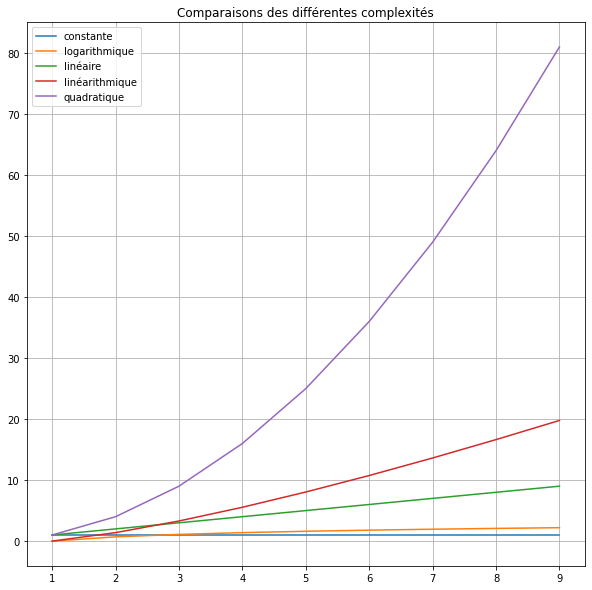

In [40]:
import matplotlib.pyplot as plt
from math import log, factorial

plt.figure(figsize=(10, 10))
x = range(1,10)
y1 = [1 for i in x]
y2 = [i for i in x]
y3 = [i**2 for i in x]
y4 = [log(i) for i in x]
y5 = [i*log(i) for i in x]
y6 = [factorial(i) for i in x]
plt.plot(x, y1, label='constante')
plt.plot(x, y4, label='logarithmique')
plt.plot(x, y2, label='linéaire')
plt.plot(x, y5, label='linéarithmique')
plt.plot(x, y3, label='quadratique')
#plt.plot(x, y6, label='factorielle')
plt.legend()
plt.title('Comparaisons des différentes complexités')
plt.grid(True)
plt.show()

### Ecriture de votre algorithme

Avant d'étudier les deux algorithmes de tri étudiés en première NSI, vous allez essayer de trouver par vous même un algorithe de tri.

Le but est de décrire dans un pseudo code, un algorithme qui permet, à votre binôme, de trier [ces tonneaux](http://lwh.free.fr/pages/algo/tri/tri.htm).

<span id="tri_selection"></span>
## Le tri par selection

### Principe

Le principe est simple :

- Dans un tableau à n éléments (indices 0 à n-1) on recherche le plus petit élément et on l'échange avec l'élément d'indice 0 : Le premier élément est maintenant le plus petit.
- Dans le tableau non trié restant (indices 1 à n-1) on recherche le plus petit élément et on l'échange avec l'élément d'indice 1 : Les deux premiers éléments sont les plus petits et sont rangés.
- Dans le tableau non trié restant (indices 2 à n-1) on recherche le plus petit élément et on l'échange avec l'élément d'indice 2 : Les trois premiers éléments sont les plus petits et sont rangés.
- etc etc

Voir l'[algorithme en musique](https://www.youtube.com/watch?v=Ns4TPTC8whw)

### Pseudo-code

```
tri_selection(tableau t)
    n ← longueur(t) 
    pour i de 0 à n - 2
        min ← i       
        pour j de i + 1 à n - 1
            si t[j] < t[min], alors min ← j
        fin pour
        échanger t[i] et t[min]
    fin pour
fin procédure
```

In [ ]:
from IPython.display import IFrame    
IFrame('https://www.cahier-nsi.fr/tri_par_selection/', width=800, height=650)

### Complexité temporelle
Prenons un tableau de $n$ éléments trié dans l'ordre décroissant (pire des cas)
- Lors du premier passage dans la boucle il y aura $n-1$ comparaisons.
- Lors du deuxième passage dans la boucle il y aura $n-2$ comparaisons.
- ...
- Lors du nième passage dans la boucle il y aura $1$ comparaison.

Le nombre total de comparaisons à effectuer est donc $1+2+3+....+(n-2)+(n-1)$ autrement dit $\sum_{j=1}^{n-1} j$

Il s'agit donc de la somme d'une **suite arithmétique de raison 1** du premier terme 1 jusqu'au dernier terme n-1. 

On obtient donc $T(n) = \frac{1+n-1}{2} \times {(n-1)} = \frac{n(n-1)}{2}$

**La complexité temporelle est donc $T(n) = \Theta(n^2)$ elle est donc quadratique.**

On peut remarquer que, pour une liste déjà triée, le nombre de comparaisons est identique.

### Implémentation

<div class="alert alert-info">A FAIRE : Implémenter la fonction <i>tri_selection</i> en Python.</div>

In [ ]:
def tri_selection(tab):
    pass

Vérifier que votre fonction fonctionne:

In [ ]:
from random import shuffle
ma_liste = [i for i in range(100)]

# on mélange la liste
shuffle(ma_liste)

# on trie la liste
tri_selection(ma_liste)
# On affiche la liste
print(ma_liste)

### Mesures

Maintenant faisons des mesures et représentons les dans un graphique.

In [ ]:
import matplotlib.pyplot as plt

quantites = [1000*n for n in range(1, 11)] # je crée la liste [1000, 2000, ... 10000]
resultats_tries = []
resultats_tries_envers = []
resultats_theoriques = []
for q in quantites:
    l = [e for e in range(q)] # Je créé une liste triée de façon croissante de q éléments
    stats = %timeit -q -o -n 1 tri_selection(l) # mesure du temps pour une liste déjà triée /!\ n=1 car 'in place'
    resultats_tries.append(stats.average)
    l = l[::-1] # j'inverse l'ordre la liste
    stats = %timeit -q -o -n 1 tri_selection(l) # mesure du temps pour une liste triée de façon décroissante /!\ n=1 car 'in place'
    resultats_tries_envers.append(stats.average)
    resultats_theoriques.append(resultats_tries_envers[0]*(q/quantites[0])**2) # on se base sur le premier temps obtenu, et on multiplie par le rapport de quantité au carré.

plt.figure(figsize=(10,6))
plt.ylim(top=max(max(resultats_tries), max(resultats_tries_envers), max(resultats_theoriques),))
plt.scatter(quantites, resultats_tries, label='Mesures pratiques liste triée de façon croissante')
plt.scatter(quantites, resultats_tries_envers, label='Mesures pratiques liste triée de façon décroissante')
plt.scatter(quantites, resultats_theoriques, label='Valeurs théoriques')
plt.grid(which='both')
plt.title("TRI PAR SELECTION : Temps d'exécution pour un tri")
plt.xlabel("Nombre d'éléments dans la liste")
plt.ylabel('Temps en seconde')
plt.legend()
plt.show()

### Observations

<ul class="alert alert-info">On peut observer que :
    <li>le tri d'une liste triée de façon croissante possède un temps d'exécution quasi identique à celui d'un tri d'une liste triée dans le sens décroissant.</li>
    <li>les mesures sont très proches des valeurs théoriques obtenues grâce à la détermination de la complexité temporelle.</li>
</ul>

[Voici une excellente page pour le **tri par selection**.](http://lwh.free.fr/pages/algo/tri/tri_selection.html)

<span id="tri_insertion"></span>

## Le tri par insertion

### Principe
Le principe est également assez simple:

- on prend la deuxième case de notre tableau que l'on compare avec la première. On échange si besoin.
- on prend la troisième case de notre tableau que l'on compare avec les précédentes (de la droite vers la gauche). On décale tant que la troisième case est inférieure puis on échange.
- on prend la quatrième case de notre tableau que l'on compare avec les précédentes (de la droite vers la gauche). On décale tant que la quatrième case est inférieure puis on échange.
- etc etc jusqu'à la dernière case.

Voir l'[algorithme en musique](https://www.youtube.com/watch?v=ROalU379l3U).

In [ ]:
from IPython.display import IFrame    
IFrame('https://www.cahier-nsi.fr/tri_par_insertion/', width=800, height=650)

### Pseudo code

```
tri_insertion(tableau T)
    pour i de 1 à taille(T) - 1
        # mémoriser T[i] dans key
        key ← T[i]                            
        # décaler vers la droite les éléments T[0]..T[i-1] qui sont plus grands que x, en partant de T[i-1]
        j ← i-1                               
        tant que j >= 0 et key < T[j]:
            T[j+1] ← T[j]
            j-1 ← j
        # placer key dans le "trou" laissé par le décalage (j+1) car on vient de faire j=j-1
        T[j+1] ← key                            
```

### Complexité temporelle
Prenons un tableau de $n$ éléments trié dans l'ordre décroissant (pire des cas)

- pour la case n°2 il y a 1 comparaison et un déplacement
- pour la case n°3 il y a 2 comparaisons et deux déplacements
- pour la case n°4 il y a 3 comparaisons et trois déplacements
- ...
- pour la case n°n il y a n-1 comparaisons et n-1 déplacements

Le nombre total de comparaisons/deplacement à effectuer est donc $1+2+3+....+(n-2)+(n-1)$

On arrive donc à un résultat identique à l'autre algorithme de tri

On obtient donc $T(n) = \frac{1+n-1}{2} \times {(n-1)} = \frac{n(n-1)}{2}$

**La complexité temporelle est donc $T(n) = \Theta(n^2)$, elle est quadratique.**

On peut cependant remarquer que, pour une liste déjà triée, il n'y a aucun déplacement dans le tableau il n'y a plus que n comparaisons.

### Implémentation

<div class="alert alert-info">A FAIRE : Implémenter la fonction <i>tri_insertion</i> en Python.</div>

In [ ]:
def tri_insertion(l):
    pass

### Mesures

Observons les mesures sur un graphique.

In [ ]:
import matplotlib.pyplot as plt

quantites = [1000*n for n in range(1, 11)]
resultats_tries = []
resultats_tries_envers = []
resultats_theoriques = []
for q in quantites:
    l = [e for e in range(q)] # Je créé une liste triée de q éléments (de 0 à q-1)
    stats = %timeit -q -o -n 1 tri_insertion(l) # mesure du temps pour une liste déjà triée /!\ n=1 car 'in place'
    resultats_tries.append(stats.average)
    l = l[::-1] # j'inverse la liste
    stats = %timeit -q -o -n 1 tri_insertion(l) # mesure du temps pour une liste triée à l'envers /!\ n=1 car 'in place'
    resultats_tries_envers.append(stats.average)
    resultats_theoriques.append(resultats_tries_envers[0]*(q/quantites[0])**2)

plt.figure(figsize=(10,6))
plt.ylim(top=max(max(resultats_tries), max(resultats_tries_envers), max(resultats_theoriques)))
plt.scatter(quantites, resultats_tries_envers, label="Mesures sur une liste triée dans l'ordre croissant")
plt.scatter(quantites, resultats_tries, label="Mesures sur une liste triée dans l'ordre décoissant")
plt.scatter(quantites, resultats_theoriques, label='Valeurs théoriques dans le pire des cas')
plt.grid(which='both')
plt.title("TRI PAR INSERTION : Temps d'exécution pour un tri")
plt.xlabel("Nombre d'éléments dans la liste")
plt.ylabel('Temps en seconde')
plt.legend()
plt.show()

Isolons, les mesures relevées pour une liste dans l'ordre **croissant**.

In [ ]:
plt.figure(figsize=(10,6))
plt.ylim(top=max(resultats_tries))
plt.scatter(quantites, resultats_tries, label="Mesures sur une liste triée dans l'ordre croissant")
plt.grid(which='both')
plt.title("TRI PAR INSERTION : Temps d'exécution pour un tri d'une liste triée de façon croissante")
plt.xlabel("Nombre d'éléments dans la liste")
plt.ylabel('Temps en seconde')
plt.legend()
plt.show()

### Observations

<ul class="alert alert-info">On observe que :
    <li>le temps nécessaire pour trier une liste triée de façon <b>décroissante</b> (pire des cas) est conforme au modèle théorique établi : il s'agit d'une <b>compléxité temporelle quadratique</b>.</li>
    <li>Le temps nécessaire pour trier une liste triée de façon <b>croissante</b> est négligeable par rapport au pire des cas.
    <li>La complexité temporelle dans le cas d'un tri croissant est linéaire comme le prédisait le modèle.</li>
</ul>

[Voici une excellente page pour le **tri par insertion**.](http://lwh.free.fr/pages/algo/tri/tri_insertion.html)

<div class="alert alert-danger">ATTENTION : On a démontré que ces tris ont tous deux une complexité quadratique dans le pire des cas. Ceci n'<b>implique pas</b> qu'ils ont les mêmes durées de traitement. On peut juste conclure qu'ils évoluent chacun de manière quadratique.</div>


## Bilan

Les deux algorithmes donnent des complexités temporelles quadratiques si on se place dans le pire des cas.

Sachant que les algorithmes de tris les plus efficaces (quick sort, tri fusion, timsort...) ont des complexités temporelles d'ordre **linéarithmique**, ces 2 algorithmes sont donc loin d'être optimaux.

<table>
    <thead>
        <tr>
            <td></td>
            <th>Complexité dans le cas optimal (déjà triée)</th>
            <th>Complexité dans le cas défavorable (triée à l'envers)</th>
            <th>Stable</th>
            <th>En place</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <th>Tri par sélection</th>
            <td>$T(n) = \Theta(n^2)$</td>
            <td>$T(n) = \Theta(n^2)$</td>
            <td>NON</td>
            <td>OUI</td>
        </tr>
        <tr>
            <th>Tri par insertion</th>
            <td>$T(n) = \Theta(n)$</td>
            <td>$T(n) = \Theta(n^2)$</td>
            <td>OUI</td>
            <td>OUI</td>
        </tr>
    </tbody>
</table>


[Retour au sommaire](../index.ipynb)